<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [53]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [54]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [55]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [56]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


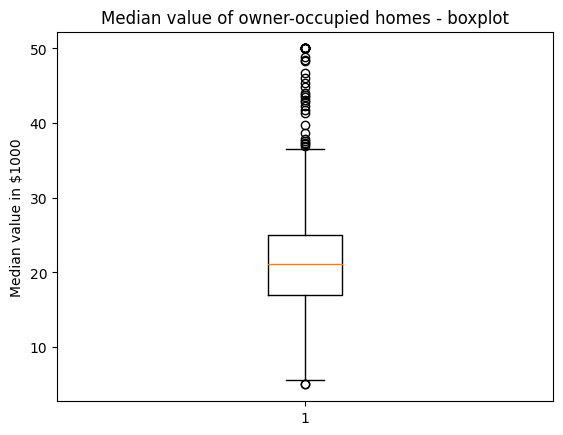

In [91]:
pyplot.boxplot(boston_df["MEDV"])
pyplot.title('Median value of owner-occupied homes - boxplot')
pyplot.ylabel('Median value in $1000')
pyplot.show()

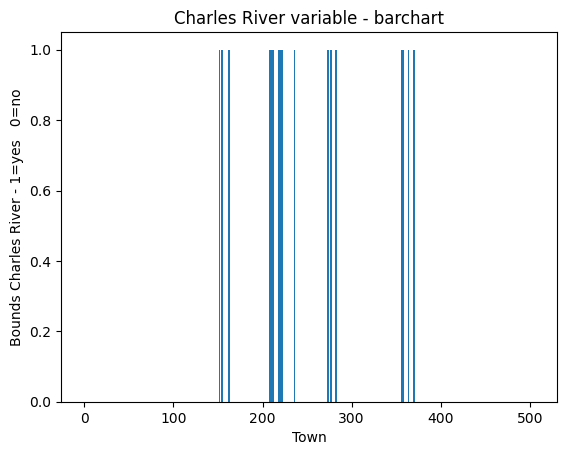

In [92]:
pyplot.bar(range(len(boston_df["CHAS"])), boston_df["CHAS"])
pyplot.xlabel('Town')
pyplot.ylabel('Bounds Charles River - 1=yes   0=no')
pyplot.title('Charles River variable - barchart')
pyplot.show()

It seems rather unusual to present a bar chart given the high number of data points, especially in the absences of any x-axis labels which I believe should be town names, and the binary nature of the Charles River dummmy variable.
As such, I'm also presenting a 2-bin histogram for the Charles River variable.


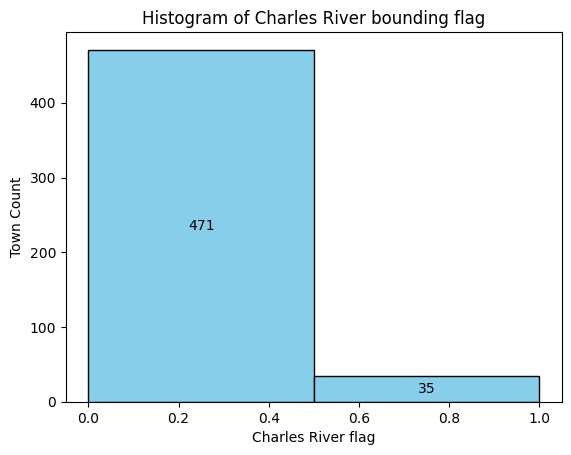

In [89]:
print("It seems rather unusual to present a bar chart given the high number of data points, especially in the absences of any x-axis labels which I believe should be town names, and the binary nature of the Charles River dummmy variable.")
print("As such, I'm also presenting a 2-bin histogram for the Charles River variable.")

pyplot.hist(boston_df["CHAS"], bins=2, color='skyblue', edgecolor='black')
pyplot.bar_label(patches, labels=[f'{int(c)}' for c in counts], label_type='center')
pyplot.xlabel('Charles River flag')
pyplot.ylabel('Town Count')
pyplot.title('Histogram of Charles River bounding flag')

# Show the histogram
pyplot.show()

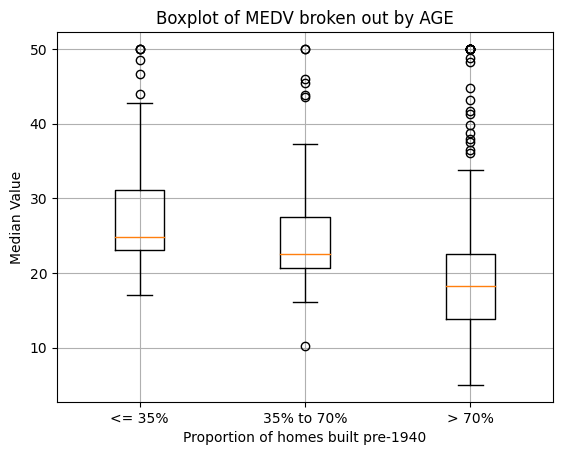

In [93]:
# Create three datasets
young_df = boston_df[boston_df['AGE'] <= 35]
temp = boston_df[boston_df['AGE'] > 35]
middle_df = temp[temp["AGE"]<70]
old_df = boston_df[boston_df['AGE'] >= 70]

# Combine the datasets into a list
data = [young_df["MEDV"], middle_df["MEDV"], old_df["MEDV"]]

# Create the boxplot

pyplot.boxplot(data, labels = ["<= 35%", "35% to 70%", "> 70%"])

# Add title and labels
pyplot.title('Boxplot of MEDV broken out by AGE')
pyplot.xlabel('Proportion of homes built pre-1940')
pyplot.ylabel('Median Value')

# Show the plot
pyplot.grid(True)
pyplot.show()

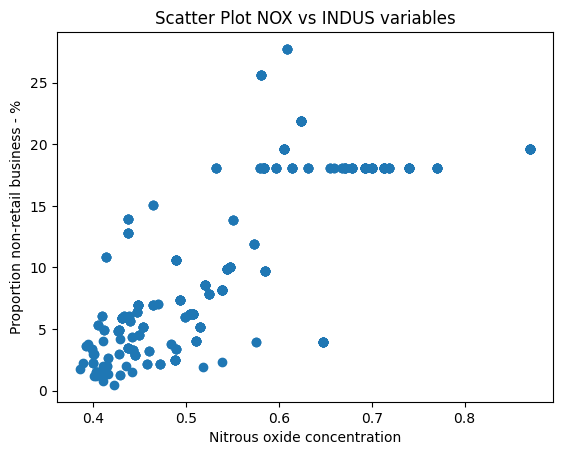

In [94]:
pyplot.scatter(boston_df["NOX"], boston_df["INDUS"])
pyplot.xlabel("Nitrous oxide concentration")
pyplot.ylabel("Proportion non-retail business - %")
pyplot.title("Scatter Plot NOX vs INDUS variables")
pyplot.show()

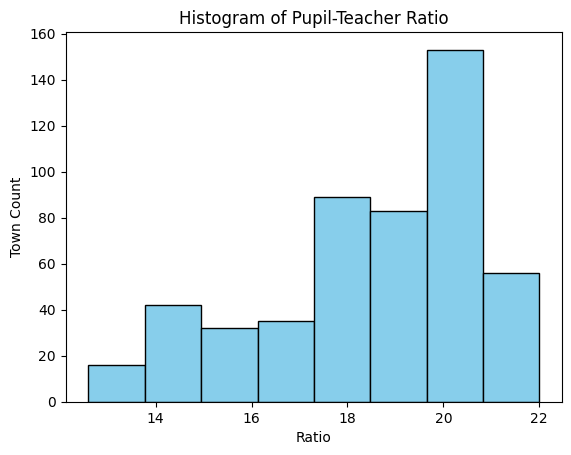

In [96]:
# Create a histogram
pyplot.hist(boston_df["PTRATIO"], bins=8, color='skyblue', edgecolor='black')

# Add labels and title
pyplot.xlabel('Ratio')
pyplot.ylabel('Town Count')
pyplot.title('Histogram of Pupil-Teacher Ratio')

# Show the histogram
pyplot.show()

In [70]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy import stats
# Define groups bounding river or not, respectively
bounds_river = boston_df[boston_df['CHAS'] == 1]
does_not_bound_river = boston_df[boston_df['CHAS'] == 0]

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(bounds_river["MEDV"], does_not_bound_river["MEDV"])

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
print("Alpha:", alpha)
print("Null hypothesis is that the median value of houses is not affected by bounding the Charles River. We will perform a two-sided test.")
if p_value < alpha/2:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Alpha: 0.05
Null hypothesis is that the median value of houses is not affected by bounding the Charles River. We will perform a two-sided test.
Reject the null hypothesis: There is a significant difference between the means of the two groups.


In [112]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(young_df["MEDV"], middle_df["MEDV"], old_df["MEDV"])

print("F-statistic:", f_statistic)
print("p-value:", p_value)
print("alpha", alpha)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least two house age group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the house age group means.")

F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
alpha 0.05
Reject the null hypothesis: There is a significant difference between at least two house age group means.


In [107]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
from scipy.stats import pearsonr

pearson_corr_scipy, p_value = pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson correlation: {pearson_corr_scipy}")
print(f"P-value: {p_value}")
print("The p-value is much smaller than our alpha value of 0.05.")
print("Accordingly, we reject our null hypothesis that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson correlation: 0.7636514469209192
P-value: 7.913361061210442e-98
The p-value is much smaller than our alpha value of 0.05.
Accordingly, we reject our null hypothesis that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town.


In [101]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
model = sm.OLS(boston_df["DIS"],boston_df["MEDV"]).fit()
predictions = model.predict(boston_df["DIS"])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Mon, 05 May 2025   Prob (F-statistic):                   1.52e-146
Time:                        09:40:47   Log-Likelihood:                         -1127.4
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV           0.1526      0.004     37.149      0.000       0.145       0.161
==============================================================================
Omnibus:                       20.539   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.148
Skew:                           0.169   Prob(JB):                     1.57e-10
Kurtosis:                       4.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1]:
print("The null hypothesis is that the there is no impact of an additional unit of weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
print("However regression analysis shows gives us a p-value very close to 0, see Prob(F-statistic) above, meaning we can reject the null hypothesis with alpha of 0.05.")
print("Finally, the coefficient of 0.1256 suggests every additional unit of weighted distance adds $125.60 to median home value; recall our units for median value are in 1000s of dollars.")

The null hypothesis is that the there is no impact of an additional unit of weighted distance to the five Boston employment centres on the median value of owner occupied homes.
However regression analysis shows gives us a p-value very close to 0, see Prob(F-statistic) above, meaning we can reject the null hypothesis with alpha of 0.05.
Finally, the coefficient of 0.1256 suggests every additional unit of weighted distance adds $125.60 to median home value; recall our units for median value are in 1000s of dollars.
